# 결합확률질량함수

주사위처럼 1부터 6까지의 값을 가지는 카테고리 분포 확률변수 X와 Y를 생각하자. 확률변수 각각의 확률적 특성은 확률질량함수 pX(x),pY(y)로 나타낼 수 있다. 확률변수가 여러 개 있을 때는 확률질량함수의 아랫 첨자로 확률변수 이름을 지정하여 어떤 확률변수의 확률질량함수인지 표시한다. 만약 공정한 주사위처럼 모든 값이 나올 확률이 같다면 각각의 확률질량함수는 다음과 같을 것이다.

$$ pX(1)={1 \over 6},…pX(6)={1 \over 6}$$

$$ pY(1)={1 \over 6},…pY(6)={1 \over 6}$$

이번에는 하나의 값이 아닌 두 개의 값, 즉 특정한 숫자 쌍이 나타나는 경우를 생각하자. 단변수 이산확률변수와 같이 단순사건에 대한 확률만 알고 있으면 임의의 숫자 쌍 집합 즉, 임의의 사건에 대해서도 확률을 계산할 수 있으므로 하나 하나의 숫자 쌍에 대해 확률을 알려주는 확률질량함수만 있으면 전체 확률분포를 알 수 있다. 이러한 확률질량함수를 **결합확률질량함수(joint probability mass function)**이라고 하며 다음과 같이 표시한다.

$$pXY(x,y)$$

이 때는 나타날 수 있는 숫자가 두 숫자로 이루어진 쌍이므로 독립변수가 x,y 두 개가 된다. 종속변수는 그 숫자 쌍이 나타날 확률이다. 즉, pXY(2,3)은 {x=2,y=3}이라는 특정한 숫자 쌍으로만 이루어진 사건의 확률이다. 만약 공정한 주사위 두 개를 던지는 경우라면 결합확률질량함수는 다음과 같을 것이다.

$$pXY(1,1)={1 \over 36},pXY(1,2)={1 \over 36},…,pXY(6,6)={1 \over 36}$$

어느 대학교에서 50명의 학생이 X, Y 두 과목에 대해 시험을 보고 그 결과가 다음과 같이 A, B, C, D, E, F 학점으로 나왔다고 가정하자. 각 열은 X과목의 학점, 각 행은 Y과목의 학점을 나타내고 행렬의 숫자는 해당 학점 조합을 받은 학생의 수다. 예를 들어 X과목을 B학점, Y과목을 C학점 받은 학생은 4명이다.

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
plt.rc("font", size=10, family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [7]:
grades = ["A", "B", "C", "D", "E", "F"]
scores = pd.DataFrame(
    [[1, 2, 1, 0, 0, 0],
     [0, 2, 3, 1, 0, 0],
     [0, 4, 7, 4, 1, 0],
     [0, 1, 4, 5, 4, 0],
     [0, 0, 1, 3, 2, 0],
     [0, 0, 0, 1, 2, 1]], 
    columns=grades, index=grades)
scores.index.name = "Y"
scores.columns.name = "X"
scores

X,A,B,C,D,E,F
Y,,,,,,
A,1,2,1,0,0,0
B,0,2,3,1,0,0
C,0,4,7,4,1,0
D,0,1,4,5,4,0
E,0,0,1,3,2,0
F,0,0,0,1,2,1


In [8]:
pmf = scores / scores.values.sum()
pmf

X,A,B,C,D,E,F
Y,,,,,,
A,0.02,0.04,0.02,0.00,0.00,0.00
B,0.00,0.04,0.06,0.02,0.00,0.00
C,0.00,0.08,0.14,0.08,0.02,0.00
D,0.00,0.02,0.08,0.10,0.08,0.00
E,0.00,0.00,0.02,0.06,0.04,0.00
F,0.00,0.00,0.00,0.02,0.04,0.02


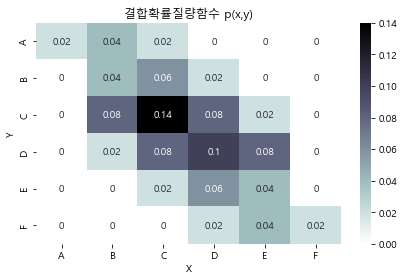

In [11]:
sns.heatmap(pmf, cmap=mpl.cm.bone_r, annot=True,
            xticklabels=['A', 'B', 'C', 'D', 'E', 'F'],
            yticklabels=['A', 'B', 'C', 'D', 'E', 'F'])
plt.title("결합확률질량함수 p(x,y)")
plt.tight_layout()
plt.show()

# 주변확률질량함수

**주변확률질량함수(marginal probability mass function)**는 두 확률변수 중 하나의 확률변수 값에 대해서만 확률분포를 표시한 함수이다. 즉 다변수가 되기 이전의 단변수 확률질량함수를 말한다.

결합확률질량함수에서 주변확률질량함수를 구하려면 전체 확률의 법칙에 의해 다른 변수가 가질 수 있는 모든 값의 결합확률질량함수를 합한 확률이 된다.

$$px(x)= \displaystyle\sum_{y_i} pxy(x.y_i)$$

$$py(y)= \displaystyle\sum_{x_i} pxy(x_i.y)$$

위에서 예로 든 이산 확률변수의 경우에 과목 X만 관심이 있다면 결합확률질량함수 pXY(x,y)로부터 X에 대한 주변확률질량함수 pX(x)를 구해야 한다.

주변확률질량함수를 계산한 값은 다음과 같다.

$$pX(A)=pXY(A,A)+pXY(A,B)+pXY(A,C)+pXY(A,D)+pXY(A,E)+pXY(A,F)=0.02$$

In [14]:
pmf_marginal_x = pmf.sum(axis=0)
pmf_marginal_x

X
A    0.02
B    0.18
C    0.32
D    0.28
E    0.18
F    0.02
dtype: float64

In [15]:
pmf_marginal_y = pmf.sum(axis=1)
pmf_marginal_y[:, np.newaxis]

D:\Anaconda\envs\minsu\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


array([[0.08],
       [0.12],
       [0.32],
       [0.28],
       [0.12],
       [0.08]])

# 조건부확률질량함수

만약 y값이 특정한 값으로 고정되었다면 확률질량함수의 단면을 이용하여 다음과 같이 그릴 수도 있다.

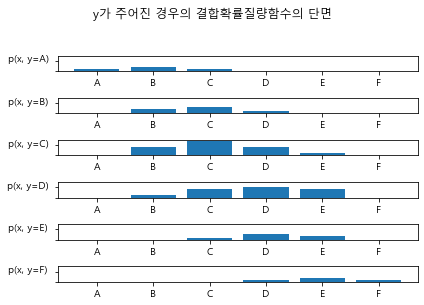

In [16]:
import string

x = np.arange(6)
for i, y in enumerate(string.ascii_uppercase[:6]):
    ax = plt.subplot(6, 1, i + 1)
    ax.tick_params(labelleft=False)
    plt.bar(x, pmf.iloc[i, :])
    plt.ylabel("p(x, y={})".format(y), rotation=0, labelpad=30)
    plt.ylim(0, 0.15)
    plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])

plt.suptitle("y가 주어진 경우의 결합확률질량함수의 단면", y=1.05)
plt.tight_layout()
plt.show()

**조건부확률질량함수(conditional probability mass function)**는 다변수 확률변수 중 하나의 값이 특정 값으로 고정되어 상수가 되어 버린 경우, 나머지 변수에 대한 확률질량함수를 말한다. 조건부확률질량함수는 다음과 같이 정의된다.



$$pX∣Y(x∣y)={pXY(x,y) \over pY(y)}$$

$$pY∣X(y∣x)={pXY(x,y) \over px(x)}$$

조건부확률질량함수의 모양은 결합질량함수 pXY(x,y)에서 y값이 고정된 함수, 즉, 결합질량함수의 단면과 같아진다. 다만 조건부확률질량함수의 합은 1이 된다.

y=A일 때의 결합확률질량함수의 단면과 확률의 합은 다음과 같다.

In [18]:
pmf.iloc[0, :]

X
A    0.02
B    0.04
C    0.02
D    0.00
E    0.00
F    0.00
Name: A, dtype: float64

In [19]:
np.sum(pmf.iloc[0, :])

0.08

y=A일 때의 조건부확률질량함수와 확률의 합은 다음과 같다.

In [20]:
cond_y0 = pmf.iloc[0, :]/pmf_marginal_y[0]
cond_y0

X
A    0.25
B    0.50
C    0.25
D    0.00
E    0.00
F    0.00
Name: A, dtype: float64

In [21]:
np.sum(cond_y0)

1.0

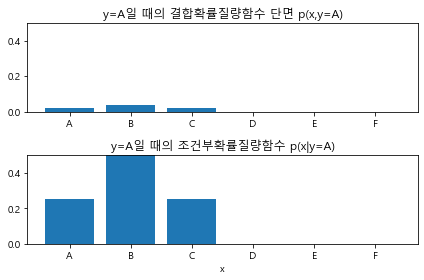

In [22]:
plt.subplot(211)
plt.bar(x, pmf.iloc[0, :])
plt.ylim(0, 0.5)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])
plt.title("y=A일 때의 결합확률질량함수 단면 p(x,y=A)")
plt.subplot(212)
plt.bar(x, cond_y0)
plt.ylim(0, 0.5)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])
plt.title("y=A일 때의 조건부확률질량함수 p(x|y=A)")
plt.xlabel("x")
plt.tight_layout()
plt.show()

y=B일 때의 결합확률질량함수의 단면과 확률의 합은 다음과 같다.

In [23]:
pmf.iloc[1, :]


X
A    0.00
B    0.04
C    0.06
D    0.02
E    0.00
F    0.00
Name: B, dtype: float64

In [24]:
np.sum(pmf.iloc[1, :])

0.12000000000000001

In [25]:
cond_y1 = pmf.iloc[1, :]/pmf_marginal_y[1]
cond_y1

X
A    0.000000
B    0.333333
C    0.500000
D    0.166667
E    0.000000
F    0.000000
Name: B, dtype: float64

In [26]:
np.sum(cond_y1)

0.9999999999999999

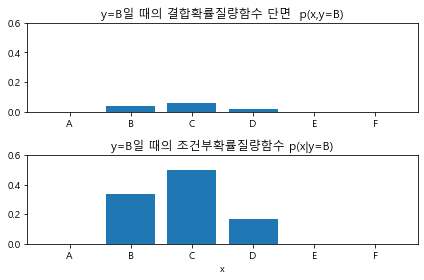

In [27]:
y = np.arange(6)
plt.subplot(211)
plt.bar(y, pmf.iloc[1, :])
plt.ylim(0, 0.6)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])
plt.title("y=B일 때의 결합확률질량함수 단면  p(x,y=B)")
plt.subplot(212)
plt.bar(y, cond_y1)
plt.ylim(0, 0.6)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])
plt.title("y=B일 때의 조건부확률질량함수 p(x|y=B)")
plt.xlabel("x")
plt.tight_layout()
plt.show()

# 다변수 연속확률변수

연속확률분포에서는 이산확률분포와 같이 단순사건을 이용하여 확률을 정의할 수 없으므로 단변수 연속확률변수처럼 누적확률분포함수를 먼저 정의한 후 이를 미분하여 확률밀도함수를 정의하는 방법을 사용한다.

# 결합누적확률분포함수

두 연속 확률변수 X, Y에 대한 결합누적확률분포함수 pXY(x,y)는 다음과 같이 정의한다.

$$FXY(x,y)=P({X<x}∩{Y<y})=P({X<x,Y<y})$$

결합누적확률분포함수 pXY(x,y)는 다음과 같은 특성을 가진다.

$$FXY(∞,∞)=1$$

$$FXY(−∞,y)=FXY(x,−∞)=0$$

# 결합확률밀도함수

단변수 확률변수의 경우처럼 결합누적확률분포함수를 미분하여 **결합확률밀도함수(joint probability density function)**를 정의할 수 있다. 독립 변수가 2개이므로 각각에 대해 모두 편미분(partial differentication)해야 한다.

$$pXY={∂^2FXY(x,y)\over∂x∂y}$$

결합확률밀도함수를 특정 구간에 대해 적분하면 해당 구간에 대한 확률이 된다.

$$\int_{x1}^{x2} \int_{y1}^{y2} pxy(x,y)dxdy = P({x1≤X≤x2,y1≤Y≤y2})$$

따라서 결합확률밀도함수를 모든 변수에 대해 −∞에서 ∞ 까지 적분하면 값이 1이 된다.



연속 확률변수의 결합확률밀도함수는 2차원 함수가 된다. 아래는 다변수정규분포의 결합확률밀도의 예를 그린 것이다. 어떤 집단에 대해 X는 몸무게, Y는 키를 나타내는 확률변수라고 하자.

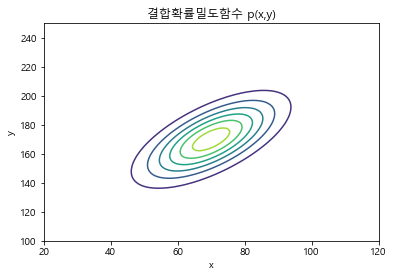

In [33]:
import scipy as sp
import scipy.stats

mu = [70, 170]
cov = [[150, 140], [140, 300]]
rv = sp.stats.multivariate_normal(mu, cov)

xx = np.linspace(20, 120, 100)
yy = np.linspace(100, 250, 100)
XX, YY = np.meshgrid(xx, yy)
ZZ = rv.pdf(np.dstack([XX, YY]))
plt.contour(XX, YY, ZZ)
plt.xlabel("x")
plt.ylabel("y")
plt.title("결합확률밀도함수 p(x,y)")
plt.show()

# 주변확률밀도함수

**주변확률밀도함수(marginal probability density function)**는 결합확률밀도함수를 특정한 하나의 변수에 대해 가중평균한 값을 말한다. 따라서 결합확률밀도함수를 하나의 확률변수에 대해서만 적분하여 구한다.


가중평균(적분)으로 인해 차원이 한 개 줄어들기 때문에 2차원 확률변수의 주변 확률 밀도 함수는 1차원 함수가 된다.

$$pX(x)=∫pXY(x,y)dy$$

$$pY(y)=∫pXY(x,y)dx$$

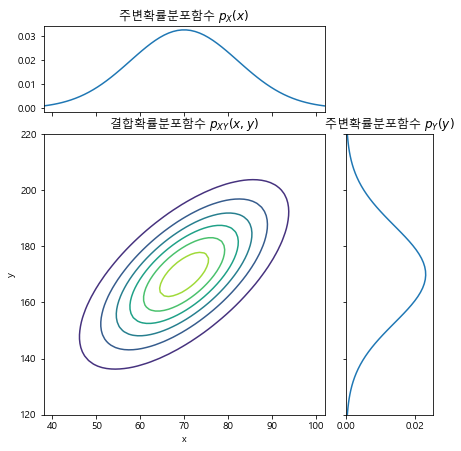

In [36]:
from matplotlib.ticker import NullFormatter
from matplotlib import transforms
from scipy.integrate import simps  # 심슨법칙(Simpson's rule)을 사용한 적분 계산

xx = np.linspace(20, 120, 100)
yy = np.linspace(100, 250, 100)
XX, YY = np.meshgrid(xx, yy)
ZZ = rv.pdf(np.dstack([XX, YY]))
fx = [simps(Z, yy) for Z in ZZ.T]
fy = [simps(Z, xx) for Z in ZZ]

plt.figure(figsize=(6, 6))

left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.05

rect1 = [left, bottom, width, height]
rect2 = [left, bottom_h, width, 0.2]
rect3 = [left_h, bottom, 0.2, height]

ax1 = plt.axes(rect1)
ax2 = plt.axes(rect2)
ax3 = plt.axes(rect3)

ax2.xaxis.set_major_formatter(NullFormatter())
ax3.yaxis.set_major_formatter(NullFormatter())

ax1.contour(XX, YY, ZZ)
ax1.set_title("결합확률분포함수 $p_{XY}(x, y)$")
ax1.set_xlabel("x")
ax1.set_ylabel("y")

ax2.plot(xx, fx)
ax2.set_title("주변확률분포함수 $p_X(x)$")

base = ax3.transData
rot = transforms.Affine2D().rotate_deg(-90)
plt.plot(-yy, fy, transform=rot + base)
plt.title("주변확률분포함수 $p_Y(y)$")

ax1.set_xlim(38, 102)
ax1.set_ylim(120, 220)
ax2.set_xlim(38, 102)
ax3.set_xlim(0, 0.025)
ax3.set_ylim(120, 220)

plt.show()

# 조건부확률밀도함수

고정된 y값에 대해 확률 밀도 함수의 단면을 표시하면 다음과 같다.

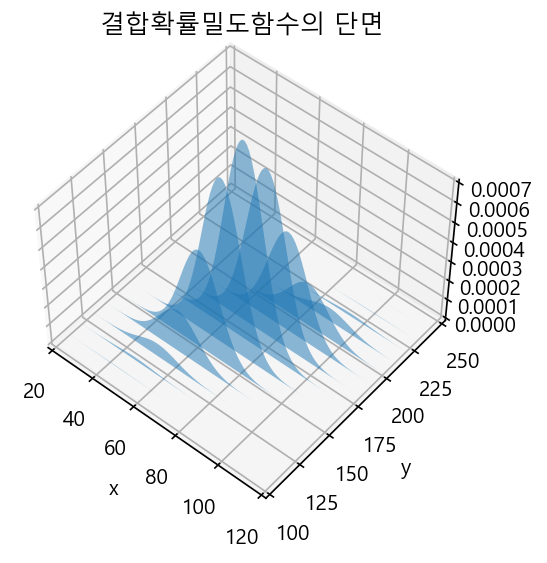

In [38]:
from matplotlib.collections import PolyCollection
from matplotlib import colors as mcolors

xx = np.linspace(20, 120, 100)
yy = np.linspace(100, 250, 16)
XX, YY = np.meshgrid(xx, yy)
ZZ = rv.pdf(np.dstack([XX, YY]))

fig = plt.figure(dpi=150)
ax = fig.gca(projection='3d')

xs = np.hstack([0, xx, 0])
zs = np.zeros_like(xs)
verts = []
for i, y in enumerate(yy):
    zs[1:-1] = ZZ[i]
    verts.append(list(zip(xx, zs)))

poly = PolyCollection(verts)
poly.set_alpha(0.5)
ax.add_collection3d(poly, zs=yy, zdir='y')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(20, 120)
ax.set_ylim(100, 250)
ax.set_zlim3d(0, 0.0007)
ax.view_init(50, -50)
plt.title("결합확률밀도함수의 단면")
plt.show()

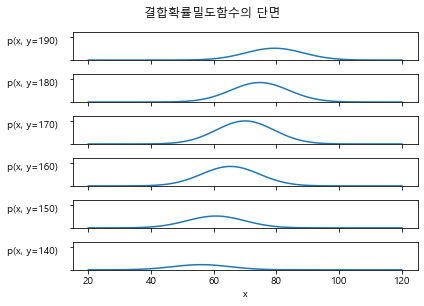

In [39]:
for i, j in enumerate(range(9, 3, -1)):
    ax = plt.subplot(6, 1, i + 1)
    ax.tick_params(labelleft=False)
    plt.plot(xx, ZZ[j, :])
    plt.ylim(0, 0.0012)
    if i < 5:
        ax.xaxis.set_ticklabels([])
    plt.ylabel("p(x, y={:.0f})".format(yy[j]), rotation=0, labelpad=40)
plt.xlabel("x")
plt.tight_layout()
plt.suptitle("결합확률밀도함수의 단면", y=1.05)
plt.show()

**조건부확률밀도함수(conditional probability density function)**는 다변수 확률변수 중 하나의 값이 특정 값이라는 사실이 알려진 경우, 이러한 조건(가정)에 의해 변화한 나머지 확률변수에 대한 확률밀도함수를 말한다

$$pX∣Y(x∣y)={pXY(x,y) \over pY(y)}$$

$$pY∣X(y∣x)={pXY(x,y) \over pX(x)}$$

조건부확률밀도함수에서 조건이 되는 확률변수의 값은 특정한 값으로 고정되어 있으므로 변수가 아니라 모수로 생각할 수 있다. 예를 들어 pX∣Y(x∣y)에서 y의 값은 고정되어 있으므로 이 값은 x의 함수가 된다.

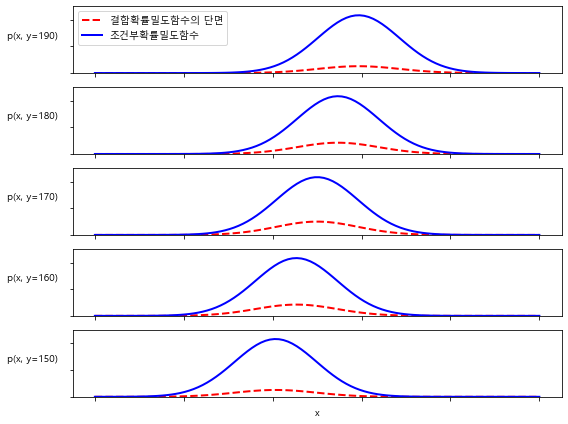

In [42]:
from scipy.integrate import simps  # 심슨법칙(Simpson's rule)을 사용한 적분 계산

mag = 10 # 확대 비율
xx = np.linspace(20, 120, 100)
yy = np.linspace(100, 250, 16)
XX, YY = np.meshgrid(xx, yy)
ZZ = rv.pdf(np.dstack([XX, YY]))
plt.figure(figsize=(8, 6))
for i, j in enumerate(range(9, 4, -1)):
    ax = plt.subplot(5, 1, i + 1)
    ax.tick_params(labelleft=False)
    plt.plot(xx, ZZ[j, :] * mag, 'r--', lw=2, label="결합확률밀도함수의 단면")
    marginal = simps(ZZ[j, :], xx)
    plt.plot(xx, ZZ[j, :] / marginal, 'b-', lw=2, label="조건부확률밀도함수")
    plt.ylim(0, 0.05)
    ax.xaxis.set_ticklabels([])
    plt.ylabel("p(x, y={:.0f})".format(yy[j]), rotation=0, labelpad=40)
    if i == 0: 
        plt.legend(loc=2)
plt.xlabel("x")
plt.tight_layout()
plt.show()

# 독립과 상관

두 확률변수가 있을 때, 한 확률변수의 표본 값이 달라지면 다른 확률변수의 조건부 분포가 달라질 때 서로 상관 관계가 있다고 한다. 반대로 두 확률변수가 상관 관계가 아니면 서로 **독립(independent)**이라고 한다. 확률변수의 독립을 수학적으로 정의하면 다음과 같다.

두 확률변수 X, Y의 결합확률밀도함수(joint pdf)가 주변확률밀도함수(marginal pdf)의 곱과 같으면 서로 독립(independent)이다.

$$pXY(x,y)=pX(x)pY(y)$$

이 정의는 확률변수가 두 개 보다 많을 때도 적용된다. 예를 들어 세 개의 확률변수 X, Y, Z의 결합확률밀도함수가 각각의 주변확률밀도함수(marginal pdf)의 곱과 같으면 세 확률변수는 서로 독립이다.

$$pXYZ(x,y,z)=pX(x)pY(y)pZ(z)$$

# 반복시행

같은 확률변수에서 복수의 표본 데이터를 취하는 경우에는 이 표본들은 서로 독립인 확률변수들에서 나온 표본으로 볼 수 있다. 따라서 확률밀도함수가 f(x)이고 표본 데이터가 {x1,x2,x3,⋯,xN}이면 이 데이터, 즉 벡터 (x1,x2,x3,⋯,xN)가 나올 확률은 다음과 같다.

# 조건부 확률분포

독립인 두 확률변수 X,Y의 조건부확률밀도함수는 주변확률밀도함수와 같다.

$$pX∣Y(x|y)={pXY(x,y) \over pY(y)}={pX(x)pY(y) \over pY(y)}=pX(x)$$

$$pY∣X(y|x)={pXY(x,y) \over pY(y)}={pX(x)pY(y) \over pY(y)}=pY(y)$$

확률변수 X가 다른 확률변수 Y에 독립이면 조건부 확률 분포가 조건이 되는 확률변수의 값에 영향을 받지 않는다. 즉, Y 값이 y1일 때와 y2일 때의 조건부 확률 분포 f(x∣y1)과 f(x∣y2)이 f(x)로 같다는 의미이다.

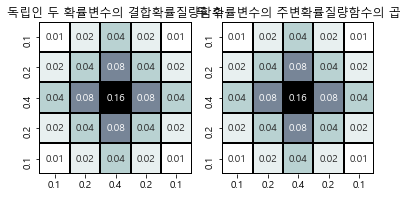

In [46]:
pmf1 = np.array([[1, 2,  4, 2, 1],
                 [2, 4,  8, 4, 2],
                 [4, 8, 16, 8, 4],
                 [2, 4,  8, 4, 2],
                 [1, 2,  4, 2, 1]])
pmf1 = pmf1/pmf1.sum()

pmf1_marginal_x = np.round(pmf1.sum(axis=0), 2)
pmf1_marginal_y = np.round(pmf1.sum(axis=1), 2)
pmf1x = pmf1_marginal_x * pmf1_marginal_y[:, np.newaxis]

plt.subplot(121)
sns.heatmap(pmf1, cmap=mpl.cm.bone_r, annot=True, square=True, linewidth=1, linecolor="k",
            cbar=False, xticklabels=pmf1_marginal_x, yticklabels=pmf1_marginal_y)
plt.title("독립인 두 확률변수의 결합확률질량함수")

plt.subplot(122)
pmf1x = pmf1_marginal_x * pmf1_marginal_y[:, np.newaxis]
sns.heatmap(pmf1x, cmap=mpl.cm.bone_r, annot=True, square=True, linewidth=1, linecolor="k",
            cbar=False, xticklabels=pmf1_marginal_x, yticklabels=pmf1_marginal_y)
plt.title("두 확률변수의 주변확률질량함수의 곱")

plt.show()

In [47]:
cond_x_y0 = pmf1[0, :]/pmf1_marginal_y[0]
cond_x_y0

array([0.1, 0.2, 0.4, 0.2, 0.1])

In [48]:
cond_x_y1 = pmf1[1, :]/pmf1_marginal_y[1]
cond_x_y1

array([0.1, 0.2, 0.4, 0.2, 0.1])

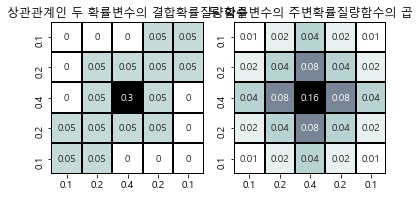

In [49]:
pmf2 = np.array([[0, 0,  0, 5, 5],
                 [0, 5,  5, 5, 5],
                 [0, 5, 30, 5, 0],
                 [5, 5,  5, 5, 0],
                 [5, 5,  0, 0, 0]])
pmf2 = pmf2/pmf2.sum()

pmf2_marginal_x = np.round(pmf2.sum(axis=0), 2)
pmf2_marginal_y = np.round(pmf2.sum(axis=1), 2)

plt.subplot(121)
sns.heatmap(pmf2, cmap=mpl.cm.bone_r, annot=True, square=True, linewidth=1, linecolor="k",
            cbar=False, xticklabels=pmf2_marginal_x, yticklabels=pmf2_marginal_y)
plt.title("상관관계인 두 확률변수의 결합확률질량함수")

plt.subplot(122)
pmf2x = pmf2_marginal_x * pmf2_marginal_y[:, np.newaxis]
sns.heatmap(pmf2x, cmap=mpl.cm.bone_r, annot=True, square=True, linewidth=1, linecolor="k",
            cbar=False, xticklabels=pmf2_marginal_x, yticklabels=pmf2_marginal_y)
plt.title("두 확률변수의 주변확률질량함수의 곱")

plt.show()

In [50]:
cond_x_y0 = pmf2[0, :]/pmf2_marginal_y[0]
cond_x_y0

array([0. , 0. , 0. , 0.5, 0.5])

In [51]:
cond_x_y1 = pmf2[1, :]/pmf2_marginal_y[1]
cond_x_y1

array([0.  , 0.25, 0.25, 0.25, 0.25])